# FEATURE ENGINEERING

In this notebook, we focus on feature engineering, a key step in our work that involves visualizing our data to select the variables that are most useful for improving the performance of our predictive models.

### Import

In [22]:
# Librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier


To make this notebook easier to read, we directly import the file prepared using the previous section, particularly to avoid the computational time associated with machine learning.

In [26]:
file_path = "/ponte/Projet_data/data_tracks_cleaned.csv"

df = pd.read_csv("https://minio.lab.sspcloud.fr" + file_path)

## I - Multivariate Analysis

We first use the `head()` method to get an overview of the first few rows of our DataFrame and explore the main characteristics of its features.

In [27]:
df.head()

,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_subgenre_encoded
0,pop,0.643106,1.205761,6,1.417813,1,-0.410645,-0.334394,-0.386352,-0.808248,0.030257,0.046248,-0.404273,0.039533
1,pop,0.490988,0.644866,11,0.601505,1,-0.541183,-0.471831,-0.365805,1.082508,0.781581,-0.566250,-0.794628,0.039533
2,pop,0.138349,1.289062,1,1.138835,0,-0.311809,-0.439329,-0.386238,-0.518509,0.438119,0.100991,-0.624472,0.039533
3,pop,0.435672,1.283509,7,1.017875,1,-0.139001,-0.674736,-0.386306,0.090785,-1.004425,0.044027,-0.715802,0.039533
4,pop,-0.034513,0.744828,1,0.705335,1,-0.549885,-0.435150,-0.386352,-0.691575,0.918967,0.100103,-0.473496,0.039533


This first look at the DataFrame allows us to observe that it contains both continuous and categorical variables. 

We define two lists to categorize the variables into continuous and categorical:

In [28]:
continuous_vars=['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
categorical_vars=['key', 'mode',  'playlist_genre', 'playlist_subgenre_encoded']


Then, we convert the categorical variables in the `categorical_vars` list to the appropriate data type (`category`) to optimize memory usage and prepare them for analysis:

This step helps streamline the handling of categorical data in the DataFrame.

In [29]:
df[categorical_vars] = df[categorical_vars].astype('category')


Once this conversion is done, we can begin visualizing our data by creating the correlation matrix for our continuous variables. This could help in identifying and eliminating strongly correlated variables.

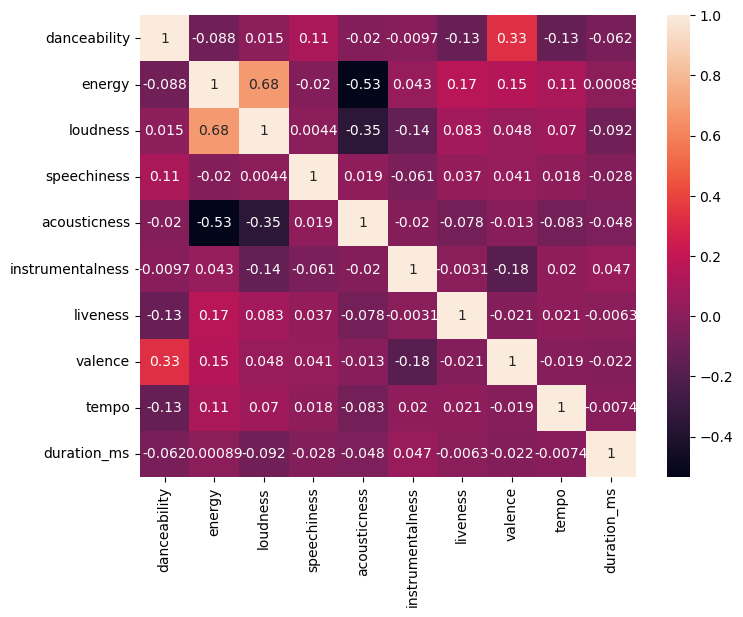

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(df[continuous_vars].corr(),annot=True);

The strongest correlation we observe is between `energy` and `acousticness`, with a value of -0.53. While this is relatively high and could suggest dropping one of these two columns, we choose to keep both. Indeed, it is generally considered that a column can be removed if the correlation exceeds 0.8, as recommended by Dormann et al. (2013).

To better visualize the differences between the various variables in genre prediction, we will plot boxplots.

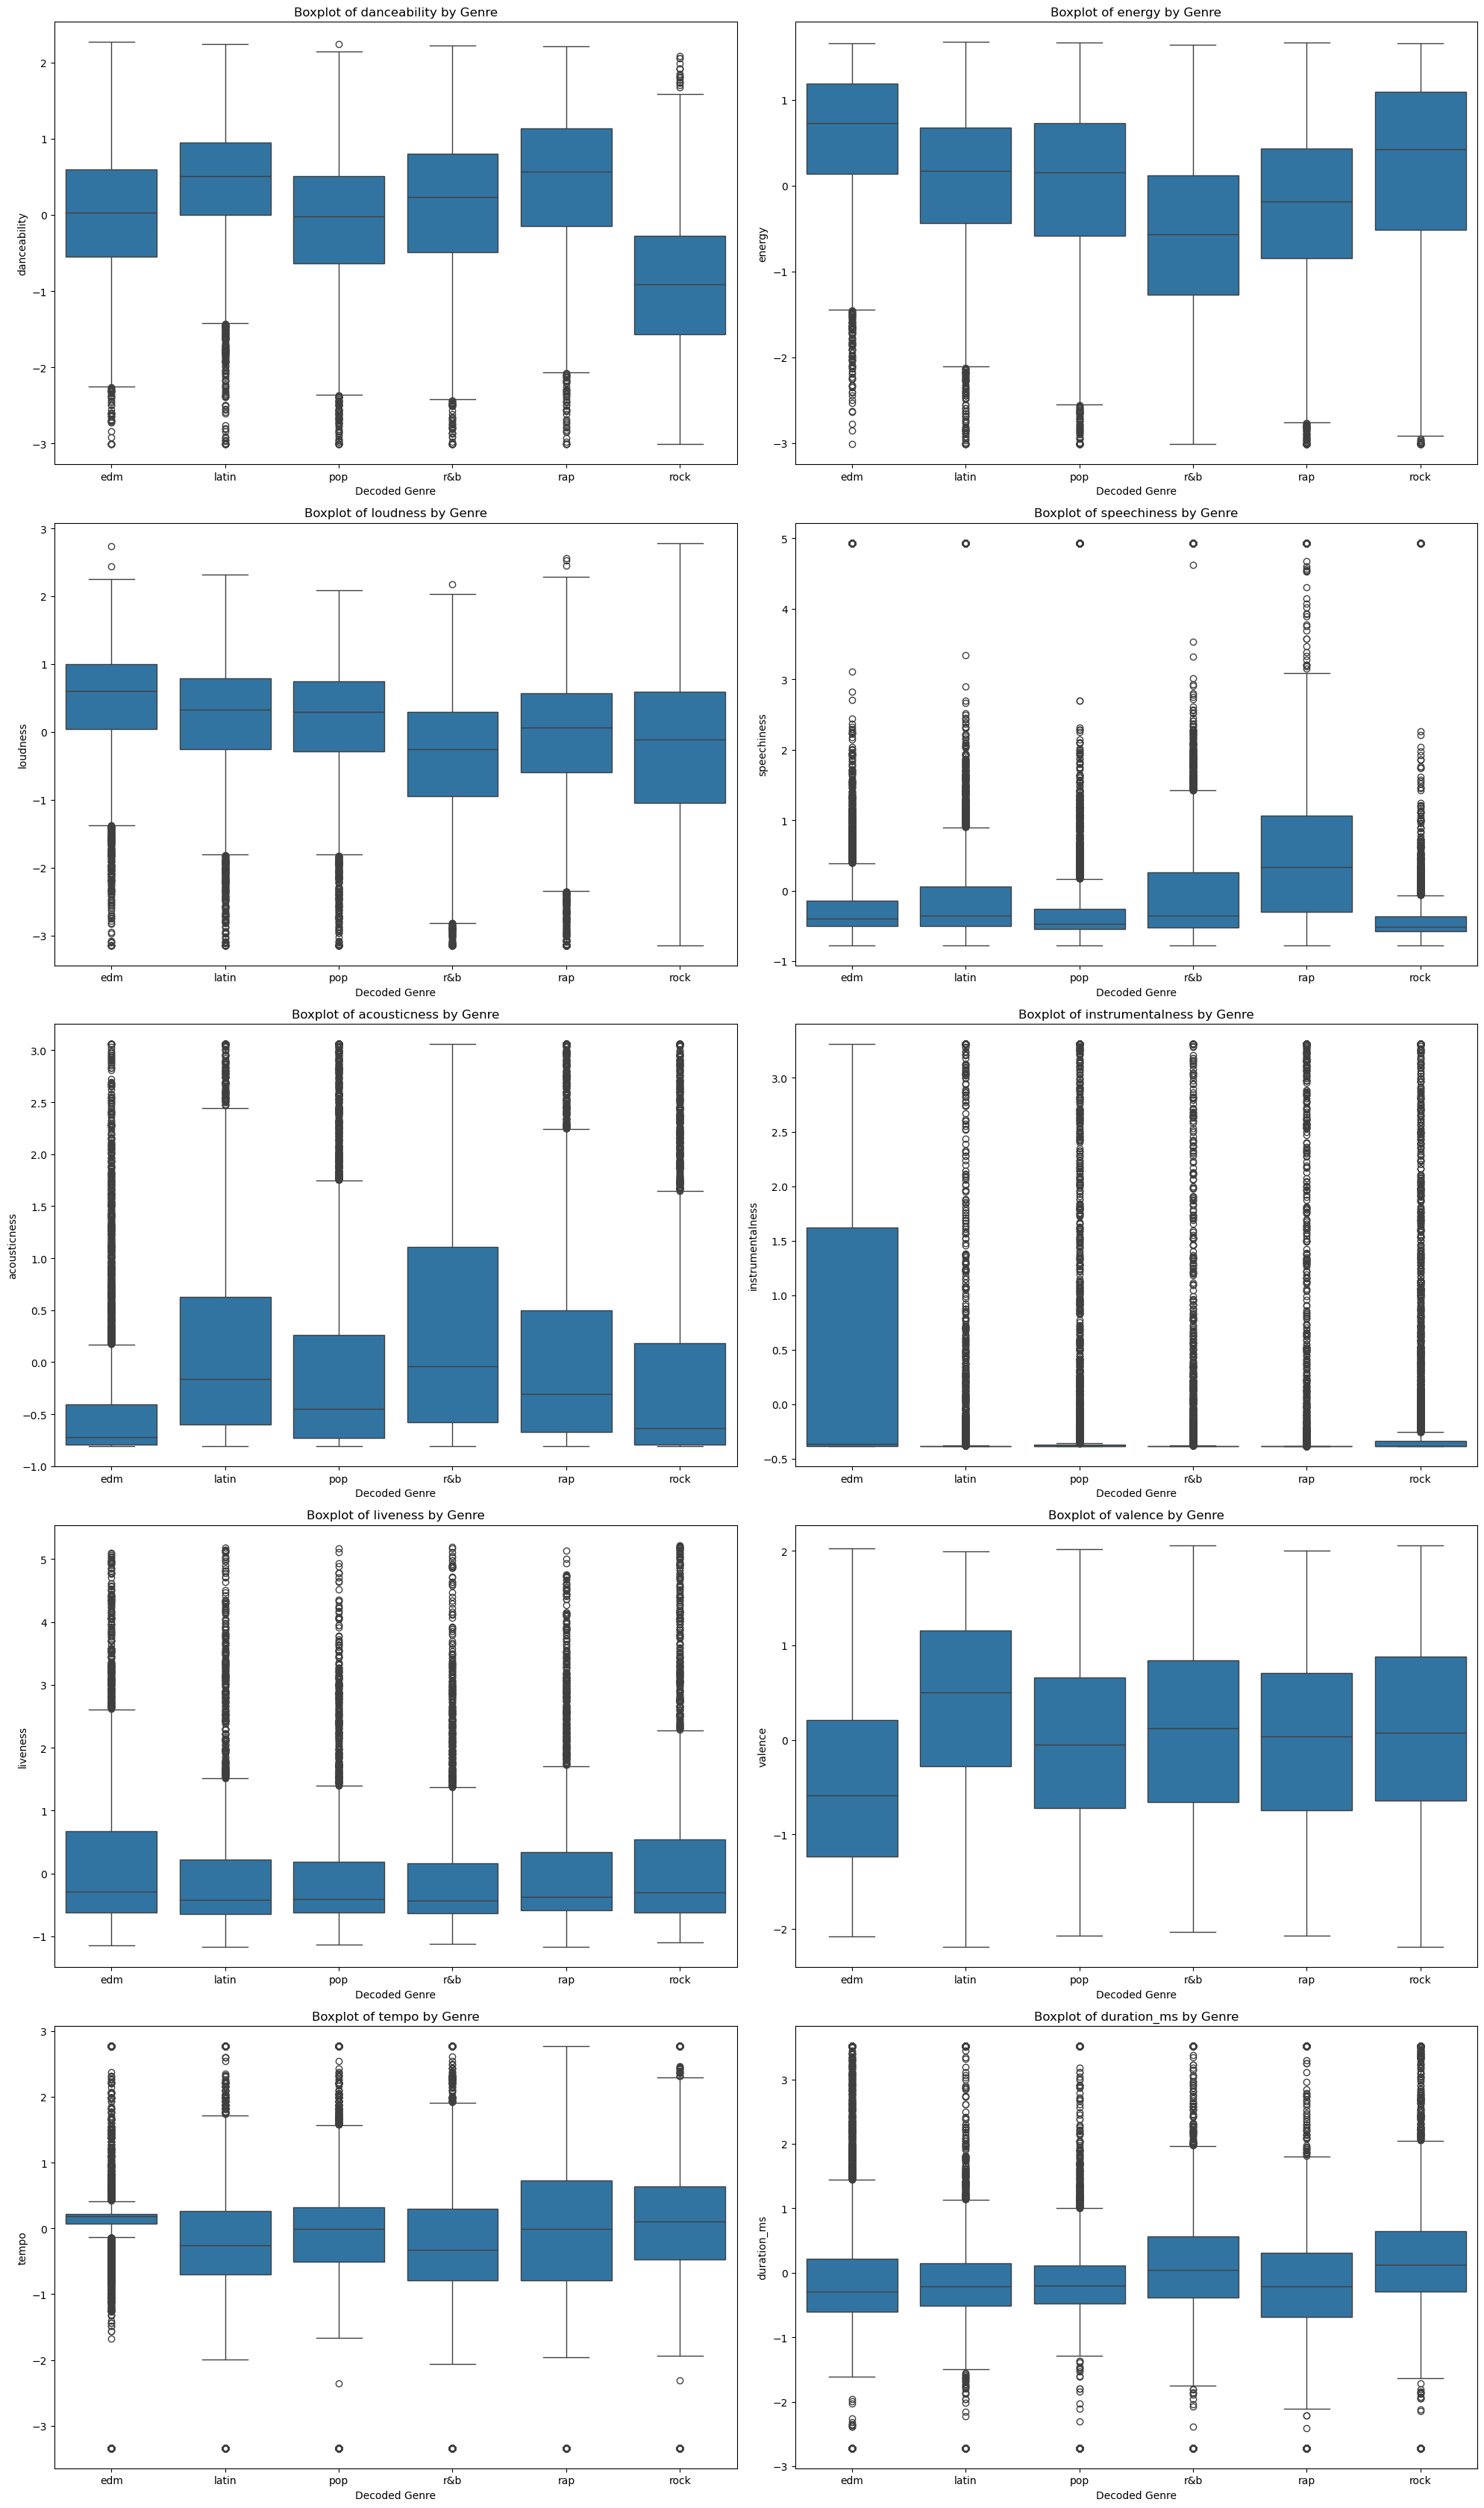

In [32]:
plt.figure(figsize=(20, 40))

for i, var in enumerate(continuous_vars):
    plt.subplot(6, 2, i+1)
    sns.boxplot(x='playlist_genre', y=var, data=df)
    plt.title(f'Boxplot of {var} by Genre')
    plt.xlabel('Decoded Genre')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

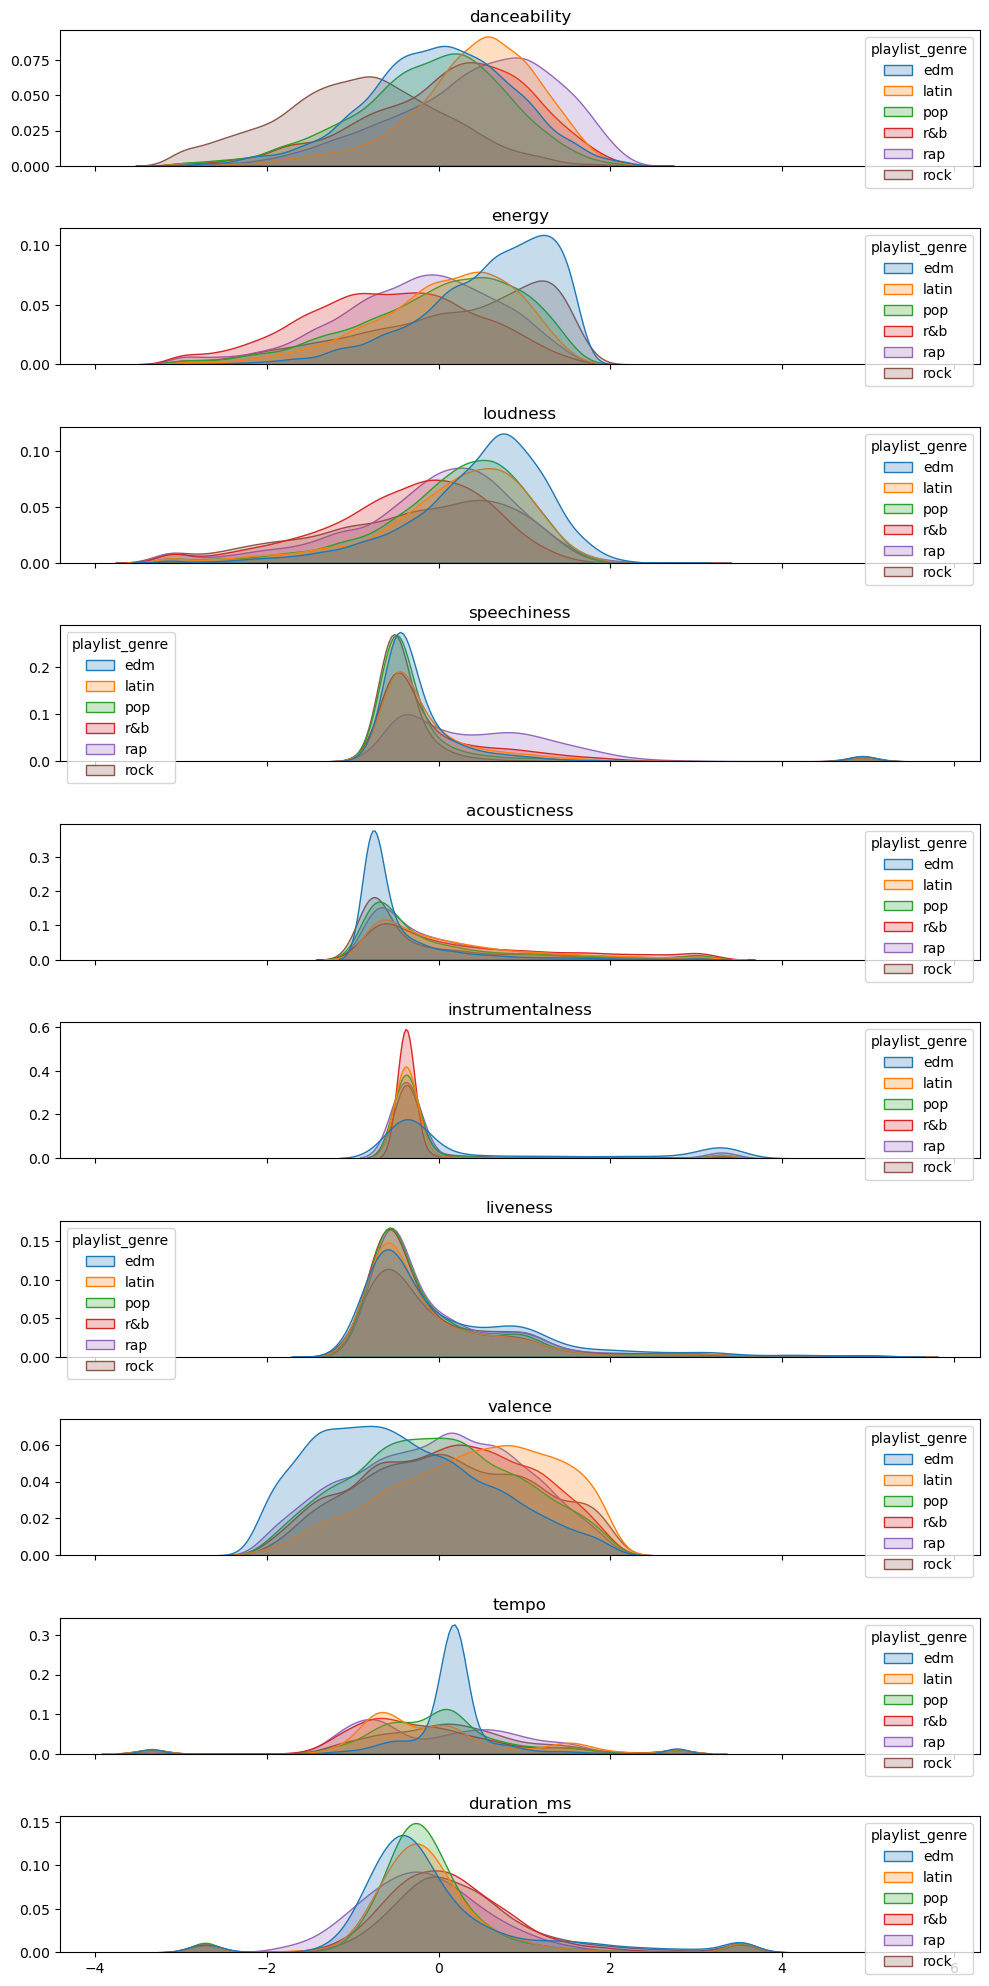

In [33]:
fig, axes = plt.subplots(len(continuous_vars),sharex=True, figsize=(10,20))

for ax, var in zip(axes, continuous_vars):
  sns.kdeplot(data=df, x=var, hue="playlist_genre", fill="playlist_genre",ax=ax);
  ax.set_title(var)
  ax.set_xlabel("")
  ax.set_ylabel("")

plt.tight_layout()

Voici une version révisée de votre texte en anglais :

---

- The `danceability` level is quite high for the EDM and Latin genres. In contrast, the Rock genre shows a lower median, indicating that rock songs are generally less danceable. The Pop, Rap, and R&B genres show a similar distribution with a moderate median. This could be due to the fact that these genres are more recent and the boundaries between genres are more fluid today.

- `EDM` has the highest energy, with a high median and a very concentrated distribution. This is expected, as EDM is a highly rhythmic genre. `Rock`, `Rap`, and `Latin` also show good energy, while `Pop` and `R&B` have more moderate levels. These genres tend to be calmer.

- `Rap` exhibits a high "speechiness" value, which is expected since this genre heavily relies on lyrics.

- `EDM` and `Rock` are the loudest genres, which makes sense given their energetic nature. The range of values is wider for `Pop` and `Rap`, showing that these genres can sometimes be calm and other times more energetic, as we observed with the energy variable.

- Songs from `R&B` and `Latin` tend to be more acoustic, while `EDM` is very electronic (with an acousticness value close to 0), which is logical.

- `liveness` is close to 0, indicating that most of the songs are studio versions.

In conclusion, musical genres show clear trends in their distribution, such as:

- EDM is energetic, fast, and often instrumental.
- Rap stands out with a high "speechiness."
- Latin is danceable, joyful, and acoustic.

These trends highlight clear differences between music genres, which will be helpful for the classification task in the modeling phase.

## II - Checking the Weight of Variables

To check if we could potentially remove any variables, we will perform a PCA and a Random Forest to determine the weight assigned to each variable by the model.

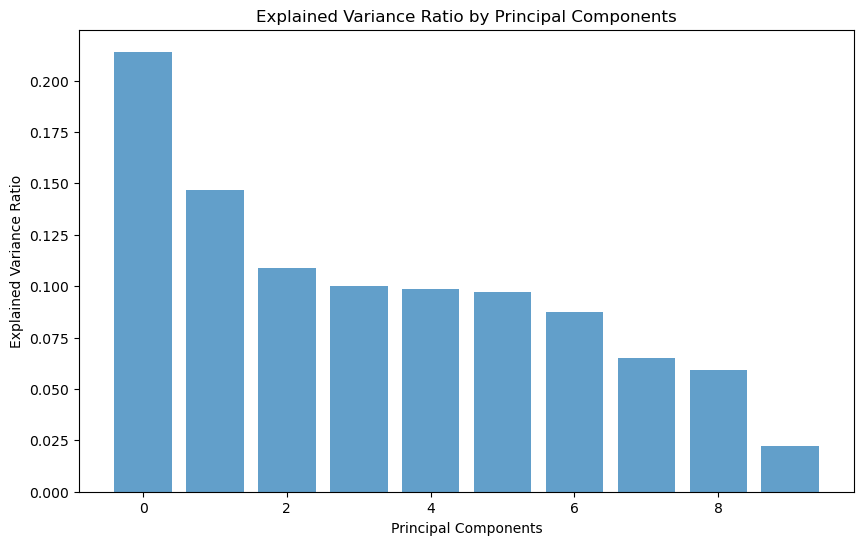

In [34]:
df_pca=df[continuous_vars]
# Perform PCA
pca = PCA()
pca.fit(df_pca)
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

PCA does not allow us to reduce our DataFrame to just a few principal components, as the first two components explain only a small portion of the variance. This is also reflected in the contribution of each variable to the principal components, as shown in the plot below:

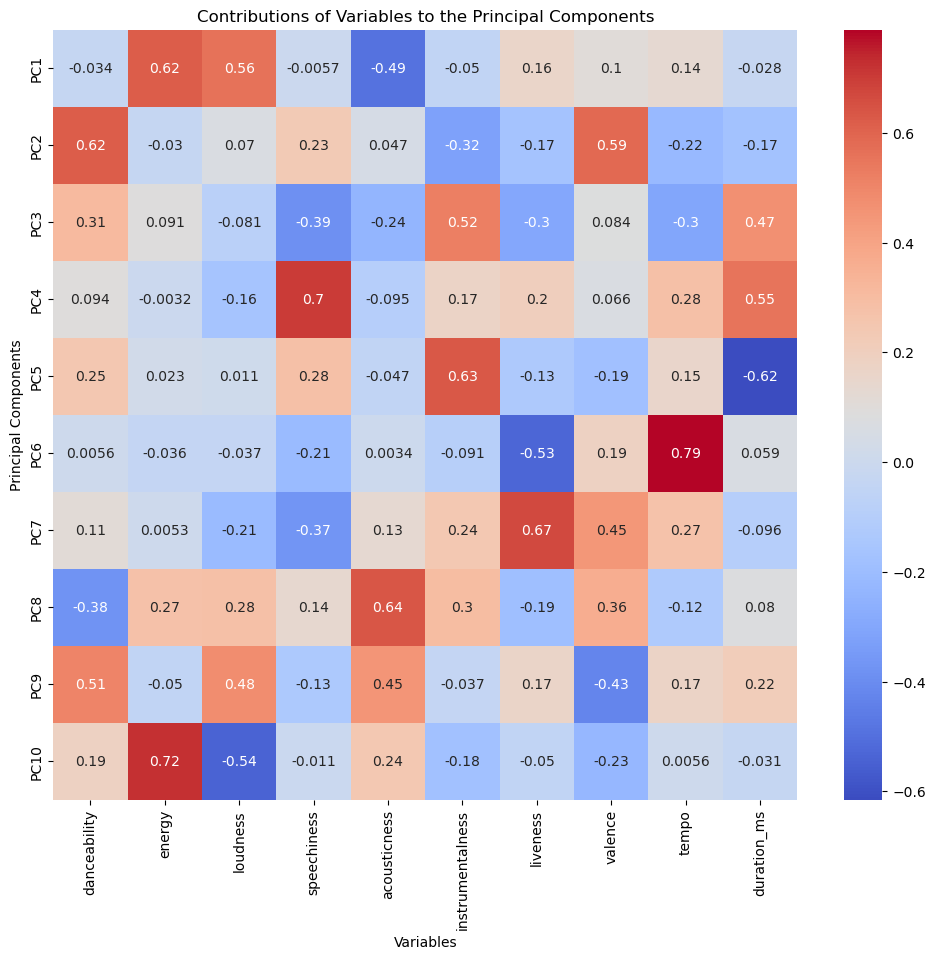

In [35]:
components = pd.DataFrame(pca.components_, columns=df_pca.columns)

plt.figure(figsize=(12, 10))
sns.heatmap(components, annot=True, cmap='coolwarm', xticklabels=df_pca.columns, yticklabels=[f'PC{i+1}' for i in range(len(components))])
plt.title("Contributions of Variables to the Principal Components")
plt.xlabel("Variables")
plt.ylabel("Principal Components")
plt.show()

To check if any qualitative components could be removed, we perform a Random Forest to evaluate the weight of each variable:

In [36]:
# Separate features (X) and target (y)
X = df.drop('playlist_genre', axis=1)
y = df['playlist_genre']

# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the importances
print(importance_df)


                      Feature  Importance
12  playlist_subgenre_encoded    0.427640
0                danceability    0.071935
5                 speechiness    0.070176
10                      tempo    0.065221
1                      energy    0.059102
6                acousticness    0.052098
9                     valence    0.050388
3                    loudness    0.049529
11                duration_ms    0.048618
7            instrumentalness    0.045092
8                    liveness    0.032166
2                         key    0.021169
4                        mode    0.006866


`playlist_subgenre_encoded` holds a high importance, and we could potentially use only this variable for our analysis. However, this variable actually contains the genre information, so we will remove it from the DataFrame.

In [19]:
df=df.drop(['playlist_subgenre_encoded'],axis=1)

Now that `playlist_subgenre_encoded` has been removed, we can re-evaluate the weight of each variable. 

In [37]:
# Separate the features (X) and the target (y)
X = df.drop('playlist_genre', axis=1)
y = df['playlist_genre']

# Initialize and fit the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to visualize the importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the importances
print(importance_df)


                      Feature  Importance
12  playlist_subgenre_encoded    0.427640
0                danceability    0.071935
5                 speechiness    0.070176
10                      tempo    0.065221
1                      energy    0.059102
6                acousticness    0.052098
9                     valence    0.050388
3                    loudness    0.049529
11                duration_ms    0.048618
7            instrumentalness    0.045092
8                    liveness    0.032166
2                         key    0.021169
4                        mode    0.006866


We could remove some variables like `mode`, `key`, and `liveness`, but for now, we will keep them in our model.

# Conclusion

In this notebook, we explored and prepared our data for modeling. We began by examining the first few rows of the dataframe and identifying continuous and categorical variables. Next, we analyzed the correlations between the different features to detect any potential redundancies. We then performed a Principal Component Analysis (PCA) to observe the variance explained by the different components, followed by a Random Forest to assess the relative importance of each variable. While some variables showed low importance, we chose to keep them for further exploration. In conclusion, this feature engineering step allowed us to better understand our data and prepare a robust set of variables for the next phase of modeling.